<a href="https://colab.research.google.com/github/chethankotian2005/INTERNSHIP/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection Trends**

### **Introduction**
Credit card fraud is one of the most significant challenges faced by financial institutions today. With the rapid increase in online transactions, fraudulent activities have also grown, leading to severe financial losses and risks to customer trust.
In this project, I worked with the Kaggle Credit Card Fraud Dataset, which contains over 284,000 transactions, of which only 492 are fraud cases (~0.17%). The dataset has anonymized features (V1–V28) obtained through Principal Component Analysis (PCA) to maintain privacy, along with Time, Amount, and Class labels.
The goal of this project is to analyze fraud vs non-fraud transaction patterns, visualize important trends, and highlight the challenges of fraud detection.


### **Objectives**
The objective of this project is to analyze and understand the characteristics of fraudulent transactions compared to non-fraudulent ones in the given dataset. The focus is on exploring the dataset to identify class imbalance, studying transaction amount patterns for fraud and non-fraud cases, and visualizing the imbalance using charts. In addition, PCA-based scatter plots are used to examine how the anonymized features can separate fraud from non-fraud, while a correlation heatmap highlights which features are more strongly related to fraudulent activity. Through these analyses, the project aims to demonstrate the distinct patterns of fraudulent transactions and to highlight the challenges posed by the highly imbalanced nature of fraud detection.

**Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset & Basic Info**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/creditcard.csv")
print(df.head())
print(df.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

**Check Missing Values**

In [ ]:
df.isnull().mean()

,0
Time,0.0
V1,0.0
V2,0.0
V3,0.0
V4,0.0
V5,0.0
V6,0.0
V7,0.0
V8,0.0
V9,0.0


**Transaction Amount Patterns**

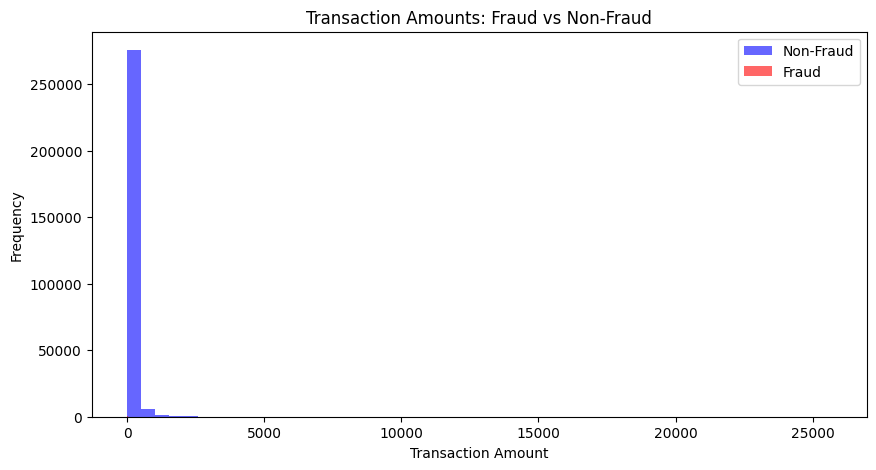

In [ ]:
# Separate fraud and non-fraud
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

# Plot histograms
plt.figure(figsize=(10,5))
plt.hist(non_fraud['Amount'], bins=50, alpha=0.6, label="Non-Fraud", color='blue')
plt.hist(fraud['Amount'], bins=50, alpha=0.6, label="Fraud", color='red')
plt.legend()
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Transaction Amounts: Fraud vs Non-Fraud")
plt.show()

**Fraud vs Non-Fraud Distribution (Pie Chart)**

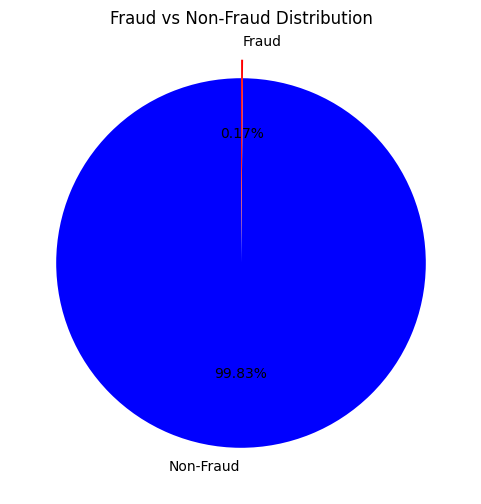

In [ ]:
fraud_count = len(fraud)
non_fraud_count = len(non_fraud)

# Labels and sizes
labels = ["Non-Fraud", "Fraud"]
sizes = [non_fraud_count, fraud_count]
colors = ['blue', 'red']

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90, explode=(0,0.1))
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()


**PCA Scatter Plot**

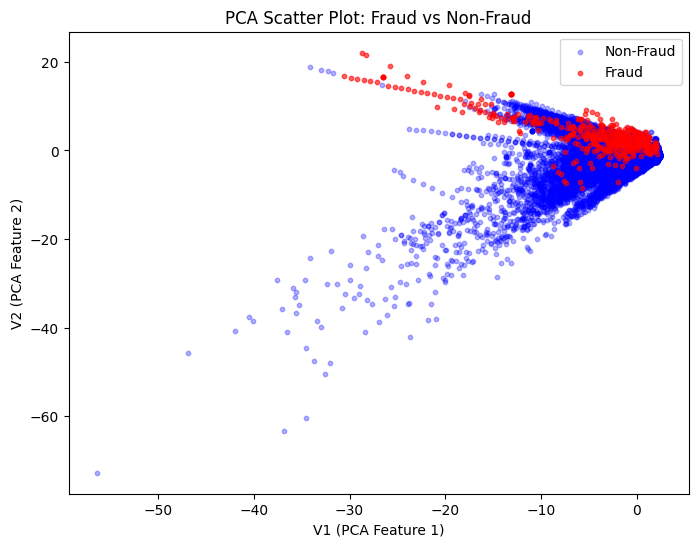

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df[df['Class']==0]['V1'], df[df['Class']==0]['V2'],
            alpha=0.3, label="Non-Fraud", c="blue", s=10)
plt.scatter(df[df['Class']==1]['V1'], df[df['Class']==1]['V2'],
            alpha=0.6, label="Fraud", c="red", s=10)
plt.xlabel("V1 (PCA Feature 1)")
plt.ylabel("V2 (PCA Feature 2)")
plt.title("PCA Scatter Plot: Fraud vs Non-Fraud")
plt.legend()
plt.show()

**Correlation Heatmap**

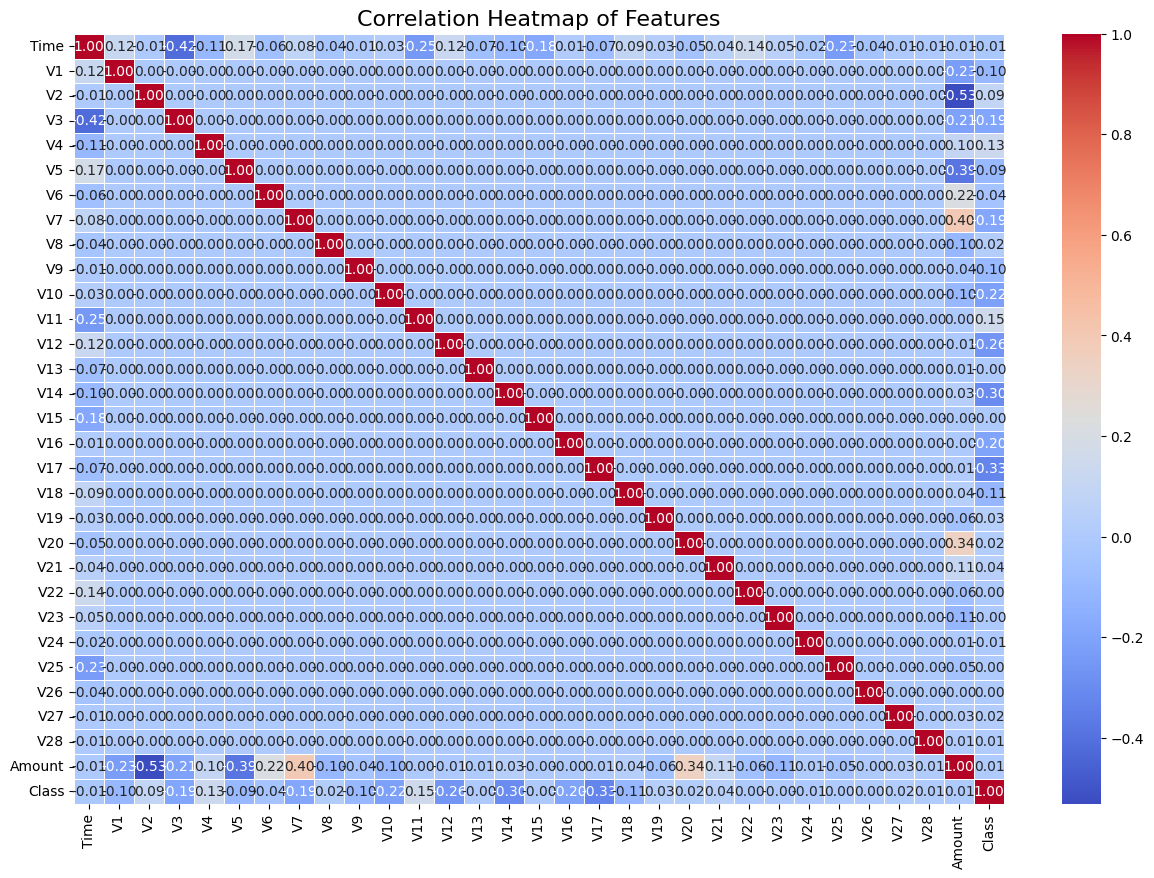

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f",linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()

**Correlation of Features with Fraud (Class)**

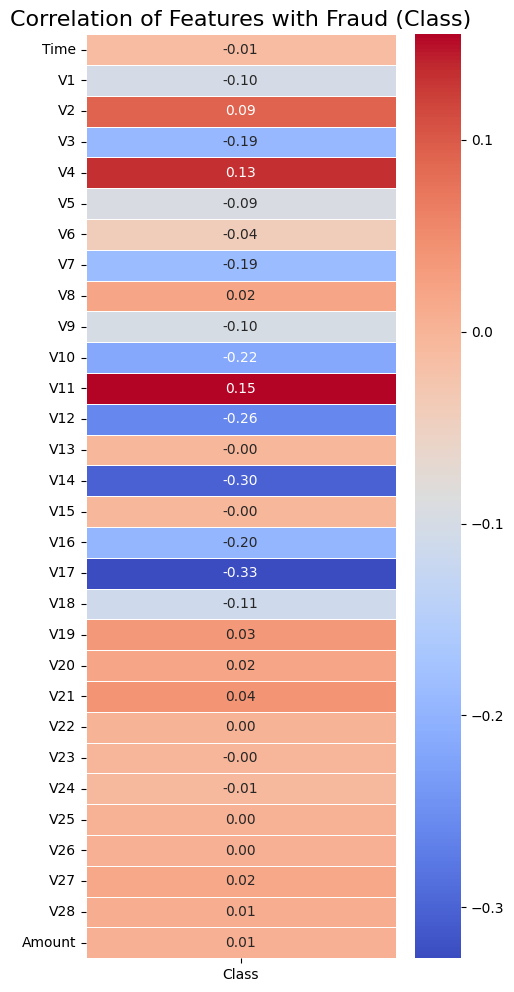

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation with target 'Class'
class_corr = df.corr()['Class'].drop('Class')

# Convert to dataframe for heatmap
class_corr_df = class_corr.to_frame()

# Plot heatmap
plt.figure(figsize=(5,12))
sns.heatmap(class_corr_df, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation of Features with Fraud (Class)", fontsize=16)
plt.show()

#red means fraud chances are high
#blue means chances of fraud is low
#0.0 wont effect anything

### **Conclusion**

This project provided an in-depth exploration of the credit card fraud dataset, focusing on identifying the differences between fraudulent and non-fraudulent transactions. The analysis showed that fraudulent transactions are extremely rare compared to genuine ones, making fraud detection a highly imbalanced problem. The study of transaction amounts revealed that frauds generally involve smaller amounts, while PCA-based scatter plots demonstrated that certain anonymized features can help in distinguishing fraud from non-fraud. The correlation analysis further highlighted specific features with stronger associations to fraud cases. Overall, this analysis emphasizes the importance of handling data imbalance and using meaningful features to build effective fraud detection systems that can assist financial institutions in minimizing losses and improving transaction security.